In [1]:
import matplotlib
matplotlib.use('agg')  # allows notebook to be tested in Travis

import pandas as pd
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import pandana as pdna
import time

import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network



%matplotlib inline


In [2]:
settings.to_dict()

{'data_folder': 'data',
 'images_folder': 'images',
 'image_filename': 'urbanaccess_plot',
 'logs_folder': 'logs',
 'log_file': True,
 'log_console': False,
 'log_name': 'urbanaccess',
 'log_filename': 'urbanaccess',
 'txt_encoding': 'utf-8',
 'gtfs_api': {'gtfsdataexch': 'http://www.gtfs-data-exchange.com/api/agencies?format=csv'}}

In [3]:
settings.log_console = True

In [4]:
settings.log_console = False

In [5]:
feeds.to_dict()

{'gtfs_feeds': {}}

In [6]:
gtfsfeeds.search(search_text='Bay Area Rapid Transit',
                 search_field=None,
                 match='contains')

Note: Your use of a GTFS feed is governed by each GTFS feed author license terms. It is suggested you read the respective license terms for the appropriate use of a GTFS feed.
Found 1 records that matched ['Bay Area Rapid Transit'] inside ['name', 'url', 'dataexchange_id', 'feed_baseurl'] columns:


,date_last_updated,dataexchange_url,date_added,is_official,feed_baseurl,name,area,url,country,state,license_url,dataexchange_id
114,2016-04-04 02:31:19,http://www.gtfs-data-exchange.com/agency/bay-a...,2007-05-14 15:49:05,True,http://www.bart.gov/schedules/developers/,Bay Area Rapid Transit,San Francisco Bay Area,http://www.bart.gov/,United States,California,http://www.bart.gov/dev/schedules/license.htm,bay-area-rapid-transit


In [7]:
gtfsfeeds.search(search_text='Bay Area Rapid Transit',
                 search_field=None,
                 match='contains',
                 add_feed=True)

Note: Your use of a GTFS feed is governed by each GTFS feed author license terms. It is suggested you read the respective license terms for the appropriate use of a GTFS feed.
Found 1 records that matched ['Bay Area Rapid Transit'] inside ['name', 'url', 'dataexchange_id', 'feed_baseurl'] columns:
Added 1 feeds to gtfs_feeds: {'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip'}
Added 1 records to gtfs_feed list:


{'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip'}

In [8]:
feeds.add_feed(add_dict={'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'})

Added 1 feeds to gtfs_feeds: {'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'}


In [9]:
feeds.to_dict()

{'gtfs_feeds': {'Bay Area Rapid Transit': 'http://www.gtfs-data-exchange.com/agency/bay-area-rapid-transit/latest.zip',
  'ac transit': 'http://www.actransit.org/wp-content/uploads/GTFSJune182017B.zip'}}

# Loading GTFS data Into an UrbanAccess transit data object

In [10]:
gtfsfeeds.download()

2 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips
Bay Area Rapid Transit GTFS feed downloaded successfully. Took 0.70 seconds for 343,657.0KB
ac transit GTFS feed downloaded successfully. Took 3.74 seconds for 11,468,341.0KB
GTFS feed download completed. Took 4.43 seconds
ac transit.zip successfully extracted to: data/gtfsfeed_text/ac transit
Bay Area Rapid Transit.zip successfully extracted to: data/gtfsfeed_text/Bay Area Rapid Transit
GTFS feed zipfile extraction completed. Took 0.30 seconds for 2 files


In [24]:
validation = True
verbose = True
# bbox for City of Oakland
bbox = (-122.355881,37.632226,-122.114775,37.884725)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
GTFS text file header whitespace check completed. Took 0.26 seconds
--------------------------------
Processing GTFS feed: Bay Area Rapid Transit
     Successfully read: stops.txt with 47 record(s). Took 0.01 seconds
     Successfully read: routes.txt with 6 record(s). Took 0.01 seconds
     Successfully read: trips.txt with 2,513 record(s). Took 0.02 seconds
     Successfully read: stop_times.txt with 31,934 record(s). Took 0.20 seconds
     Successfully read: calendar.txt with 3 record(s). Took 0.01 seconds
     Successfully read: calendar_dates.txt with 50 record(s). Took 0.01 seconds
     Successfully read: agency.txt with 1 record(s). Took 0.00 seconds
The unique agency ID: bay_area_rapid_transit was generated using the name of the agency in the agency.txt file for tables: ['stops', 'routes', 'trips', 'stop_times', 'calendar', 'calendar_dates'].
Unique agency ID operation complet

     Successfully read: trips.txt with 15,069 record(s). Took 0.17 seconds
     Successfully read: stop_times.txt with 662,439 record(s). Took 3.73 seconds
     Successfully read: calendar.txt with 20 record(s). Took 0.01 seconds
     Successfully read: calendar_dates.txt with 15 record(s). Took 0.00 seconds
     Successfully read: agency.txt with 1 record(s). Took 0.00 seconds
The unique agency ID: ac_transit was generated using the name of the agency in the agency.txt file for tables: ['stops', 'routes', 'trips', 'stop_times', 'calendar', 'calendar_dates'].
Unique agency ID operation complete. Took 0.07 seconds.
Unique GTFS feed ID operation complete. Took 0.01 seconds.
Records:
         stop_id                         stop_name   stop_lat    stop_lon  \
195      0200010       Bayside Common Condominiums  37.896314 -122.308150   
196      0200030            Buchanan St:Jackson St  37.887757 -122.300790   
197      0200040            Buchanan St:Jackson St  37.887509 -122.301187   
19

# The transit data object 

In [25]:
# looking for the data types.
# loaded_feeds.stops.dtypes
loaded_feeds.stops.head()



,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,unique_agency_id,unique_feed_id,route_type,stop_code,location_type_desc,wheelchair_boarding_desc
0,12TH,12th St. Oakland City Center,NaN,37.803664,-122.271604,12TH,http://www.bart.gov/stations/12TH/,0.0,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1.0,NaN,stop,At least some vehicles at this stop can be boa...
1,19TH,19th St. Oakland,NaN,37.807870,-122.269029,19TH,http://www.bart.gov/stations/19TH/,0.0,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1.0,NaN,stop,At least some vehicles at this stop can be boa...
2,19TH_N,19th St. Oakland,NaN,37.807870,-122.269029,19TH,http://www.bart.gov/stations/19TH/,0.0,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1.0,NaN,stop,At least some vehicles at this stop can be boa...
3,ASHB,Ashby,NaN,37.853024,-122.269780,ASHB,http://www.bart.gov/stations/ASHB/,0.0,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1.0,NaN,stop,At least some vehicles at this stop can be boa...
4,BAYF,Bay Fair,NaN,37.697185,-122.126871,BAYF,http://www.bart.gov/stations/BAYF/,0.0,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1.0,NaN,stop,At least some vehicles at this stop can be boa...


In [26]:
#creating data fram to clean data.

# import pandas as pd 
# import numpy as np

# df = pd.DataFrame(loaded_feeds.stops)

# df
loaded_feeds.stops.unique_agency_id.unique()

array(['bay_area_rapid_transit', 'ac_transit'], dtype=object)

<AxesSubplot: xlabel='stop_lon', ylabel='stop_lat'>

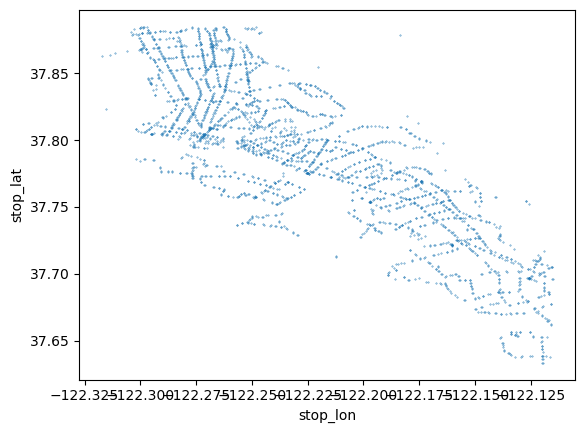

In [27]:
loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

In [28]:
loaded_feeds.routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,unique_agency_id,unique_feed_id,route_type_desc
0,01,BART,NaN,Pittsburg/Bay Point - SFIA/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ffff33,NaN,bay_area_rapid_transit,bay_area_rapid_transit_1,Underground rail: Subway or Metro
1,03,BART,NaN,Fremont - Richmond,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff9933,NaN,bay_area_rapid_transit,bay_area_rapid_transit_1,Underground rail: Subway or Metro
2,05,BART,NaN,Fremont - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,339933,NaN,bay_area_rapid_transit,bay_area_rapid_transit_1,Underground rail: Subway or Metro
3,07,BART,NaN,Richmond - Daly City/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff0000,NaN,bay_area_rapid_transit,bay_area_rapid_transit_1,Underground rail: Subway or Metro
4,11,BART,NaN,Dublin/Pleasanton - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,0099cc,NaN,bay_area_rapid_transit,bay_area_rapid_transit_1,Underground rail: Subway or Metro


In [29]:
loaded_feeds.stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,unique_agency_id,unique_feed_id,route_type,pickup_type_desc,drop_off_type_desc,timepoint_desc,departure_time_sec
0,01SFO10SUN,08:05:00,08:05:00,ORIN,2,Millbrae,NaN,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1,Regularly scheduled pickup,Regularly scheduled drop off,Times are considered exact,29100.0
1,01SFO10SUN,08:11:00,08:11:00,ROCK,3,Millbrae,NaN,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1,Regularly scheduled pickup,Regularly scheduled drop off,Times are considered exact,29460.0
2,01SFO10SUN,08:15:00,08:15:00,MCAR_S,4,Millbrae,NaN,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1,Regularly scheduled pickup,Regularly scheduled drop off,Times are considered exact,29700.0
3,01SFO10SUN,08:19:00,08:19:00,19TH,5,Millbrae,NaN,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1,Regularly scheduled pickup,Regularly scheduled drop off,Times are considered exact,29940.0
4,01SFO10SUN,08:20:00,08:20:00,12TH,6,Millbrae,NaN,NaN,NaN,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,1,Regularly scheduled pickup,Regularly scheduled drop off,Times are considered exact,30000.0


In [30]:
loaded_feeds.trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,unique_agency_id,unique_feed_id,bikes_allowed_desc,wheelchair_accessible_desc
0,01,WKDY,01SFO10,San Francisco Int'l Airport,0,NaN,01_shp,1.0,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,Vehicle being used on this particular trip can...,Vehicle being used on this particular trip can...
1,01,SAT,01SFO10SAT,Millbrae,0,NaN,01_shp,1.0,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,Vehicle being used on this particular trip can...,Vehicle being used on this particular trip can...
2,01,SUN,01SFO10SUN,Millbrae,0,NaN,01_shp,1.0,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,Vehicle being used on this particular trip can...,Vehicle being used on this particular trip can...
3,01,WKDY,02SFO10,San Francisco Int'l Airport,0,NaN,01_shp,1.0,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,Vehicle being used on this particular trip can...,Vehicle being used on this particular trip can...
4,01,SAT,02SFO10SAT,Millbrae,0,NaN,01_shp,1.0,1.0,bay_area_rapid_transit,bay_area_rapid_transit_1,Vehicle being used on this particular trip can...,Vehicle being used on this particular trip can...


In [31]:
loaded_feeds.calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,unique_agency_id,unique_feed_id
0,WKDY,1,1,1,1,1,0,0,20160328,20170131,bay_area_rapid_transit,bay_area_rapid_transit_1
1,SAT,0,0,0,0,0,1,0,20160328,20170131,bay_area_rapid_transit,bay_area_rapid_transit_1
2,SUN,0,0,0,0,0,0,1,20160328,20170131,bay_area_rapid_transit,bay_area_rapid_transit_1
3,1706SU-D2-Saturday-02,0,0,0,0,0,1,0,20170624,20170819,ac_transit,ac_transit_2
4,1706SU-D2-Sunday-02,0,0,0,0,0,0,1,20170618,20170813,ac_transit,ac_transit_2


# Create a transit network

In [32]:

ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '10:00:00'],
                                   calendar_dates_lookup=None)

calendar_dates table has records however the 'calendar_dates_lookup' parameter is None, no trips will be selected using calendar_dates.
Using calendar to extract service_ids to select trips...
9 service_ids were extracted from calendar.
7,552 trip(s) 42.95 percent of 17,582 total trip records were found in calendar for GTFS feed(s): ['bay area rapid transit', 'ac transit'].
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
7,552 of 17,582 total trips were extracted representing calendar day: monday. Took 0.05 seconds.
Note: Processing may take a long time depending on the number of records. Total unique tri

The UrbanAccess network object

The output is a global urbanaccess_network object. This object holds the resulting graph comprised of nodes and edges for the processed GTFS network data for services operating at the day and time you specified inside of transit_edges and transit_nodes.

Let's set the global network object to a variable called urbanaccess_net that we can then inspect:


In [33]:
urbanaccess_net = ua.network.ua_network

In [34]:
urbanaccess_net.transit_edges.head()

,node_id_from,node_id_to,weight,unique_agency_id,unique_trip_id,sequence,id,route_type,unique_route_id,net_type
0,FTVL_bay_area_rapid_transit,COLS_bay_area_rapid_transit,4.0,bay_area_rapid_transit,02DC10_bay_area_rapid_transit,1,02DC10_bay_area_rapid_transit_1,1,05_bay_area_rapid_transit,transit
1,COLS_bay_area_rapid_transit,SANL_bay_area_rapid_transit,4.0,bay_area_rapid_transit,02DC10_bay_area_rapid_transit,2,02DC10_bay_area_rapid_transit_2,1,05_bay_area_rapid_transit,transit
2,SANL_bay_area_rapid_transit,BAYF_bay_area_rapid_transit,3.0,bay_area_rapid_transit,02DC10_bay_area_rapid_transit,3,02DC10_bay_area_rapid_transit_3,1,05_bay_area_rapid_transit,transit
3,WOAK_bay_area_rapid_transit,LAKE_bay_area_rapid_transit,6.0,bay_area_rapid_transit,03DC10_bay_area_rapid_transit,1,03DC10_bay_area_rapid_transit_1,1,05_bay_area_rapid_transit,transit
4,LAKE_bay_area_rapid_transit,FTVL_bay_area_rapid_transit,3.0,bay_area_rapid_transit,03DC10_bay_area_rapid_transit,2,03DC10_bay_area_rapid_transit_2,1,05_bay_area_rapid_transit,transit


In [35]:
urbanaccess_net.transit_nodes.head()

,x,y,unique_agency_id,route_type,stop_id,stop_name,parent_station,stop_code,wheelchair_boarding,zone_id,location_type,net_type
node_id,,,,,,,,,,,,
12TH_bay_area_rapid_transit,-122.271604,37.803664,bay_area_rapid_transit,1.0,12TH,12th St. Oakland City Center,NaN,NaN,1.0,12TH,0.0,transit
19TH_bay_area_rapid_transit,-122.269029,37.807870,bay_area_rapid_transit,1.0,19TH,19th St. Oakland,NaN,NaN,1.0,19TH,0.0,transit
19TH_N_bay_area_rapid_transit,-122.269029,37.807870,bay_area_rapid_transit,1.0,19TH_N,19th St. Oakland,NaN,NaN,1.0,19TH,0.0,transit
ASHB_bay_area_rapid_transit,-122.269780,37.853024,bay_area_rapid_transit,1.0,ASHB,Ashby,NaN,NaN,1.0,ASHB,0.0,transit
BAYF_bay_area_rapid_transit,-122.126871,37.697185,bay_area_rapid_transit,1.0,BAYF,Bay Fair,NaN,NaN,1.0,BAYF,0.0,transit


<AxesSubplot: xlabel='x', ylabel='y'>

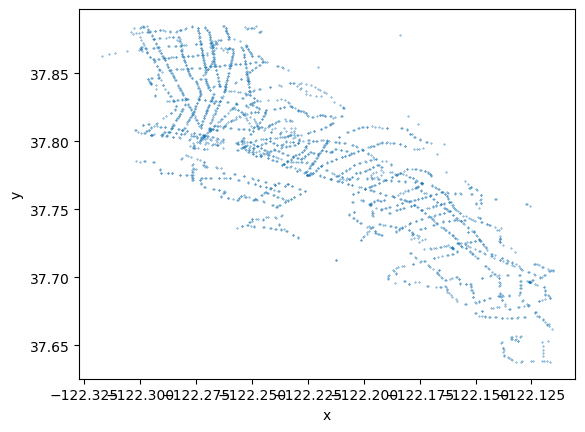

In [36]:
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)